In [33]:
import pandas as pd
import numpy as np
import json
import re
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
sns.set_theme()

with open('all_scores.json', 'r') as file:
    data = json.load(file)

P_x = data['positive']['valence']
N_x = data['negative']['valence']

HA_y = data['positive']['arousal_high']
LA_y = data['positive']['arousal_low']

df = pd.read_csv("dataset_final.csv", header=0)
df.rename(columns=lambda x: re.sub(r'_\d+_', '_', x), inplace=True)


In [34]:
df2 = df.iloc[2:, 21:-1]
df2.reset_index(drop=True, inplace=True)
df2.index += 1

df_expl = df2.filter(regex='explanation')
df_demo = df2.filter(items=['Gender', 'Age'])

# drop the explanation and gender, age columns
df_val_arou = df2.drop(columns=df_expl.columns.tolist() + df_demo.columns.tolist())

# map values to -1 and 1
df_val_arou_mapped = df_val_arou.map(lambda value: np.interp(value, [50, 450], [-1, 1]))

# df_valence = df_val_arou_mapped.filter(regex="_x")
# valence_columns = df_valence.columns

# df_arousal = df_val_arou_mapped.filter(regex="_y")
# arousal_columns = df_arousal.columns

In [35]:
df_val_arou_mapped = df_val_arou_mapped.apply(lambda x: x.round(3) if x.dtype == 'float' else x)
df_val_arou_mapped

,S1PHA_x,S1PHA_y,S1NHA_x,S1NHA_y,S1B_x,S1B_y,S1PLA_x,S1PLA_y,S1NLA_x,S1NLA_y,...,S4PHA_x,S4PHA_y,S4NHA_x,S4NHA_y,S4B_x,S4B_y,S4NLA_x,S4NLA_y,S4PLA_x,S4PLA_y
1,0.445,0.195,0.385,0.445,-0.290,0.120,0.925,0.105,0.440,0.575,...,0.060,0.010,-0.295,0.125,0.020,0.030,0.005,0.005,0.020,-0.010
2,0.880,-0.150,-0.020,0.005,0.940,-0.175,0.910,-0.195,-0.655,-0.575,...,0.730,0.610,0.730,0.630,0.705,0.620,0.720,0.605,0.745,0.620
3,0.385,0.255,0.175,0.670,0.135,-0.215,0.250,-0.040,0.175,0.675,...,0.285,-0.280,-0.010,0.050,0.305,-0.340,0.130,-0.105,0.365,0.200
4,0.065,-0.685,-0.545,-0.075,0.075,0.305,0.755,-0.295,0.205,0.195,...,0.475,0.030,0.150,-0.245,-0.195,0.130,0.670,-0.380,0.770,0.645
5,0.325,0.160,-0.435,-0.115,0.050,-0.040,-0.115,-0.180,-0.280,0.085,...,0.030,0.095,-0.020,0.090,0.110,0.225,-0.005,-0.050,0.015,-0.145
6,-0.390,-0.455,-0.520,0.175,0.005,0.030,0.020,0.010,-0.160,0.290,...,0.020,-0.020,0.825,-0.005,0.520,0.020,0.935,-0.030,0.575,0.025
7,0.690,-0.640,0.285,-0.575,0.675,0.690,0.775,0.120,-0.770,0.140,...,0.515,-0.195,0.325,0.000,0.475,-0.275,-0.440,0.000,0.455,-0.295
8,0.280,0.620,0.095,0.570,0.440,0.450,0.260,-0.290,0.280,0.265,...,0.145,0.435,0.920,0.170,0.300,-0.425,0.585,0.760,0.605,0.775
9,0.720,-0.595,-0.030,0.045,0.205,-0.255,0.830,-0.105,-0.515,0.325,...,0.800,-0.425,0.405,0.170,-0.020,-0.020,-0.030,-0.020,0.910,0.550
10,0.005,0.175,-0.375,-0.030,-0.025,0.020,-0.005,-0.020,0.135,0.175,...,0.305,-0.335,0.555,-0.420,0.440,-0.230,0.780,-0.560,0.305,-0.300


In [36]:
new_data = {}
correlation_df = []

for column_name in df_val_arou_mapped.columns:
    if '_x' in column_name:
        if 'P' in column_name:
            actual_x = P_x    
        elif 'N' in column_name:
            actual_x = N_x
        elif 'B' in column_name:
            actual_x = 0

        new_data[column_name] = actual_x
    elif '_y' in column_name:
        if 'HA' in column_name:
            actual_y = HA_y
        elif 'LA' in column_name:
            actual_y = LA_y
        elif 'B' in column_name:
            actual_y = 0 
        new_data[column_name] = actual_y
    


for index, row in df_val_arou_mapped.iterrows():
    x_and_y = []
    for i, col_name in enumerate(df_val_arou_mapped.columns, 1):
        x_and_y.append(col_name)
        if i % 2 == 0:
            
            pair_name = col_name.replace("_x", "").replace("_y", "")
            correlation_df.append({
                    'Participant': index,
                    'Pair': pair_name,
                    'Classification': pair_name.replace("S1", "").replace("S2", "").replace("S3", "").replace( "S4", ""),
                    'Participant_x': row[x_and_y[0]],
                    'Participant_y': row[x_and_y[1]],
                    # 'Participant_xy': np.array((row[x_and_y[0]], row[x_and_y[1]])),
                    'Actual_x': new_data[x_and_y[0]],
                    'Actual_y': new_data[x_and_y[1]],
                    'Actual_xy': np.array((new_data[x_and_y[0]], new_data[x_and_y[1]]))
                })
            x_and_y.clear()
df_new = pd.DataFrame(correlation_df)
df_new

,Participant,Pair,Classification,Participant_x,Participant_y,Actual_x,Actual_y,Actual_xy
0,1,S1PHA,PHA,0.445,0.195,0.5,0.5,"[0.5, 0.5]"
1,1,S1NHA,NHA,0.385,0.445,-0.5,0.5,"[-0.5, 0.5]"
2,1,S1B,B,-0.290,0.120,0.0,0.0,"[0, 0]"
3,1,S1PLA,PLA,0.925,0.105,0.5,-0.5,"[0.5, -0.5]"
4,1,S1NLA,NLA,0.440,0.575,-0.5,-0.5,"[-0.5, -0.5]"
...,...,...,...,...,...,...,...,...
495,25,S4PHA,PHA,0.735,0.590,0.5,0.5,"[0.5, 0.5]"
496,25,S4NHA,NHA,0.850,0.460,-0.5,0.5,"[-0.5, 0.5]"
497,25,S4B,B,0.575,0.300,0.0,0.0,"[0, 0]"
498,25,S4NLA,NLA,-0.435,0.770,-0.5,-0.5,"[-0.5, -0.5]"


In [37]:
big_df = pd.DataFrame()

for participant in df_new['Participant'].unique():
    for i in range(1,5):
        selection_df = df_new.query(f"Participant == {participant}").query(f"Pair.str.contains('{i}')")
        selection_b = selection_df.query(f"Pair.str.contains('B')")

        new_selection_df = selection_df.assign(
                Participant_x_n=lambda x: round(x.Participant_x - selection_b.Participant_x.values[0], 3),
                Participant_y_n=lambda y: round(y.Participant_y - selection_b.Participant_y.values[0], 3),
        )
        big_df = pd.concat([big_df, new_selection_df], ignore_index=True)


big_df

,Participant,Pair,Classification,Participant_x,Participant_y,Actual_x,Actual_y,Actual_xy,Participant_x_n,Participant_y_n
0,1,S1PHA,PHA,0.445,0.195,0.5,0.5,"[0.5, 0.5]",0.735,0.075
1,1,S1NHA,NHA,0.385,0.445,-0.5,0.5,"[-0.5, 0.5]",0.675,0.325
2,1,S1B,B,-0.290,0.120,0.0,0.0,"[0, 0]",0.000,0.000
3,1,S1PLA,PLA,0.925,0.105,0.5,-0.5,"[0.5, -0.5]",1.215,-0.015
4,1,S1NLA,NLA,0.440,0.575,-0.5,-0.5,"[-0.5, -0.5]",0.730,0.455
...,...,...,...,...,...,...,...,...,...,...
495,25,S4PHA,PHA,0.735,0.590,0.5,0.5,"[0.5, 0.5]",0.160,0.290
496,25,S4NHA,NHA,0.850,0.460,-0.5,0.5,"[-0.5, 0.5]",0.275,0.160
497,25,S4B,B,0.575,0.300,0.0,0.0,"[0, 0]",0.000,0.000
498,25,S4NLA,NLA,-0.435,0.770,-0.5,-0.5,"[-0.5, -0.5]",-1.010,0.470


In [38]:
big_df = big_df.assign(
    Participant_xy_n = big_df.apply(
        lambda row: np.array([row.Participant_x_n, row.Participant_y_n]), axis=1
    )
)

big_df = big_df.assign(
    Participant_dist = big_df.apply(
    lambda row: np.linalg.norm(row.Participant_xy_n - np.array(row.Actual_xy)), axis=1
    )
)
big_df


,Participant,Pair,Classification,Participant_x,Participant_y,Actual_x,Actual_y,Actual_xy,Participant_x_n,Participant_y_n,Participant_xy_n,Participant_dist
0,1,S1PHA,PHA,0.445,0.195,0.5,0.5,"[0.5, 0.5]",0.735,0.075,"[0.735, 0.075]",0.485644
1,1,S1NHA,NHA,0.385,0.445,-0.5,0.5,"[-0.5, 0.5]",0.675,0.325,"[0.675, 0.325]",1.187960
2,1,S1B,B,-0.290,0.120,0.0,0.0,"[0, 0]",0.000,0.000,"[0.0, 0.0]",0.000000
3,1,S1PLA,PLA,0.925,0.105,0.5,-0.5,"[0.5, -0.5]",1.215,-0.015,"[1.215, -0.015]",0.863973
4,1,S1NLA,NLA,0.440,0.575,-0.5,-0.5,"[-0.5, -0.5]",0.730,0.455,"[0.73, 0.455]",1.557217
...,...,...,...,...,...,...,...,...,...,...,...,...
495,25,S4PHA,PHA,0.735,0.590,0.5,0.5,"[0.5, 0.5]",0.160,0.290,"[0.16, 0.29]",0.399625
496,25,S4NHA,NHA,0.850,0.460,-0.5,0.5,"[-0.5, 0.5]",0.275,0.160,"[0.275, 0.16]",0.846301
497,25,S4B,B,0.575,0.300,0.0,0.0,"[0, 0]",0.000,0.000,"[0.0, 0.0]",0.000000
498,25,S4NLA,NLA,-0.435,0.770,-0.5,-0.5,"[-0.5, -0.5]",-1.010,0.470,"[-1.01, 0.47]",1.095901


In [39]:
big_df.groupby("Classification").agg({"Participant_dist": "mean"})

,Participant_dist
Classification,
B,0.000000
NHA,0.795461
NLA,0.940804
PHA,0.911070
PLA,0.900662


In [40]:
# Dictionary to store labels and corresponding queries
queries = {
    "PHA": "Pair.str.contains('PHA')",
    "PLA": "Pair.str.contains('PLA')",
    "NHA": "Pair.str.contains('NHA')",
    "NLA": "Pair.str.contains('NLA')"
}

# Define colors for each label
colors = {
    "PHA": "green",
    "PLA": "lightgreen",
    "NHA": "red",
    "NLA": "orange"
}

Text(0, 0.5, 'Arousal')

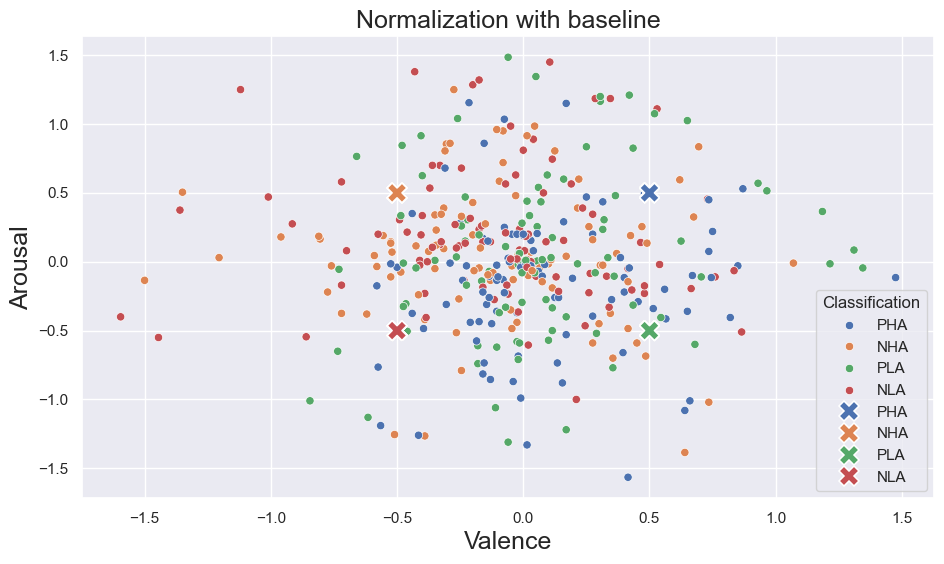

In [41]:
filtered_df = big_df.query('Classification != "B"')

# Create the first plot with normalized values
fig, ax = plt.subplots(1, figsize=(11, 6))

sns.scatterplot(data=filtered_df, x="Participant_x_n", y="Participant_y_n", hue="Classification")
sns.scatterplot(data=filtered_df, x="Actual_x", y="Actual_y", hue="Classification", marker='X', s=200)

ax.set_title('Normalization with baseline', fontsize=18)
ax.set_xlabel("Valence", fontsize=18)
ax.set_ylabel("Arousal", fontsize=18)





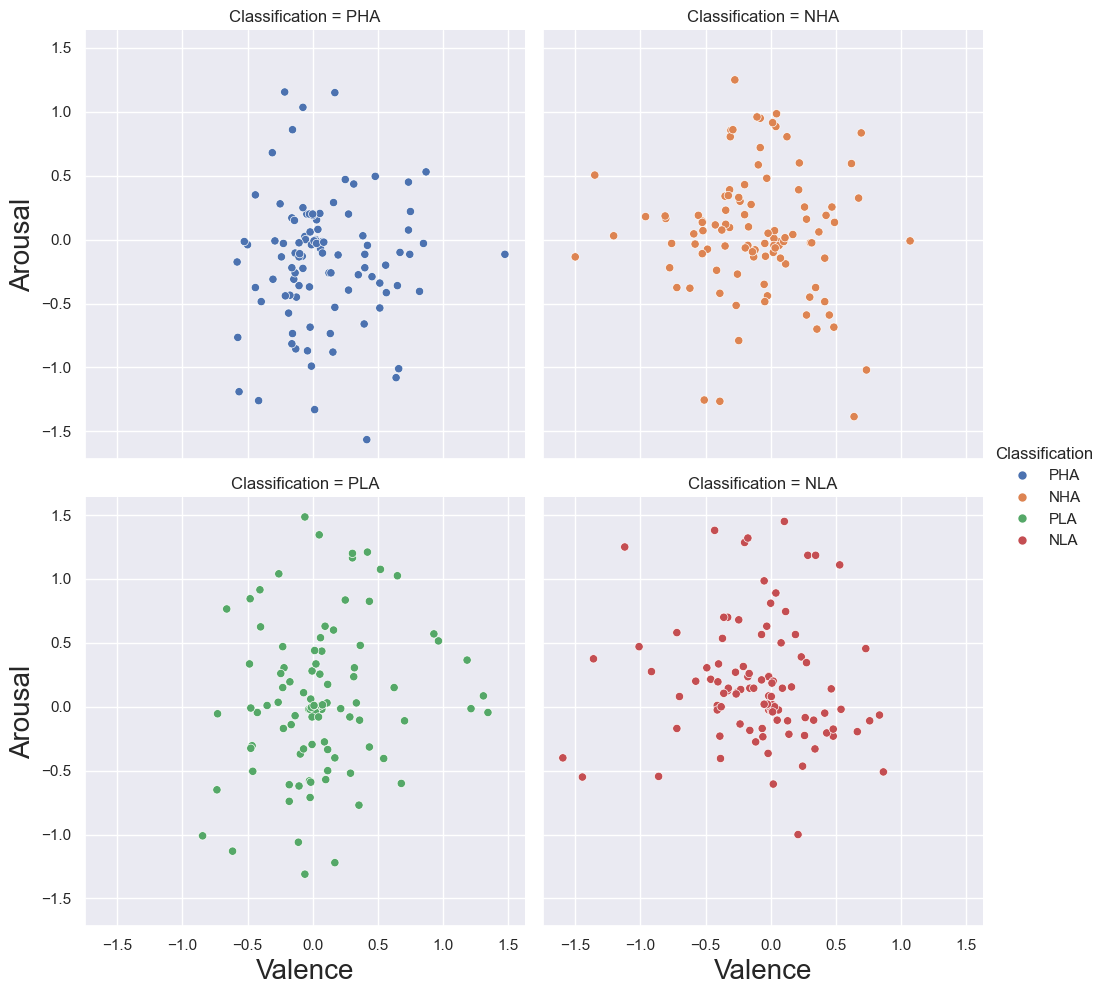

In [42]:
filtered_df = big_df.query('Classification != "B"')
r = sns.relplot(data=filtered_df, x="Participant_x_n", y="Participant_y_n", hue="Classification", col="Classification", col_wrap=2, kind="scatter")
r.set_axis_labels("Valence", "Arousal", fontsize=20)

In [387]:
# np.interp(value,[100,900], [-1,1])

K means clustering

In [43]:
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances